In [3]:
import pandas as pd
import importlib
#import fileDistanceProcessing as fdp
import importlib
#importlib.reload(fdp) 

In [4]:
X=pd.read_csv("../data/csv/sars2_mers_sars1.txt",skipinitialspace = True )

In [6]:
X.columns = X.columns.str.strip()
X.columns

Index(['Virus', 'ACCESSION', 'WHO_TYPE', 'ACCESSION_PROT', 'PROTEIN',
       'DUZINA_NUC', 'KOD_NUC'],
      dtype='object')

In [7]:

X.head(20)

,Virus,ACCESSION,WHO_TYPE,ACCESSION_PROT,PROTEIN,DUZINA_NUC,KOD_NUC
0,SARS_COV_2,LC636493.1,Alpha,BCY15809.1,ORF1ab polyprotein ...,21279,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...
1,SARS_COV_2,LC638682.1,Alpha,BCZ16426.1,ORF1ab polyprotein ...,21279,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...
2,SARS_COV_2,BS001166.1,Alpha,BDB07859.1,ORF1ab polyprotein ...,21279,ATGGAGAGCTTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...
3,SARS_COV_2,BS001219.1,Alpha,BDB46179.1,ORF1ab polyprotein ...,21279,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...
4,SARS_COV_2,BS001143.1,Alpha,BDA77043.1,ORF1ab polyprotein ...,21279,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...
5,SARS_COV_2,BS001382.1,Alpha,BDD78230.1,ORF1a polyprotein ...,13206,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...
6,SARS_COV_2,BS001191.1,Alpha,BDB08160.1,ORF1a polyprotein ...,13206,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...
7,SARS_COV_2,BS001144.1,Alpha,BDA77055.1,ORF1ab polyprotein ...,21279,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...
8,SARS_COV_2,BS001171.1,Alpha,BDB07919.1,ORF1ab polyprotein ...,21279,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...
9,SARS_COV_2,BS001200.1,Alpha,BDB45952.1,ORF1a polyprotein ...,13206,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
import pickle
import os
from zipfile import ZipFile

#raspakuj arhivu
with ZipFile("../data/distance_matrix.zip",'r') as zip:
    zip.extractall("..")

In [10]:

with open("../data/distance_matrix", "rb") as infile:
     	distances = pickle.load(infile)

os.remove("../data/distance_matrix")

In [11]:
#ista je metrika samo se sada racuna instant na osnovu indeksa instanci
def distance_from_matrix(x, y):
    
    i = int(x[-1]) #indeks je na poslednjem mestu u listi
    j = int(y[-1])

    # matrica je u obliku trougla bez dijagonale originalne matrice
    first = min(i, j)
    second = max(i, j) - (first + 1) # veci indeks smanji za broj instanci u redu matrice do dijagonale 

    return 0 if i == j else distances[first][second] #udaljenost x od y

In [12]:
X_len = X["DUZINA_NUC"].tolist()

# uzima u obzir i pocetne duzine sekvenci
def distance_with_num_triplets_difference(x, y):

    i = int(x[-1]) #indeks je na poslednjem mestu u listi
    j = int(y[-1])

    first = min(i, j)
    second = max(i, j) - (first + 1)

    # distanca se povecava za razliku u broju tripleta (kao da nema odsecacnja)
    return 0 if i == j else distances[first][second] + abs(X_len[i] - X_len[j]) / 3.0 #udaljenost x od y

In [13]:
# uzima u obzir i pocetne duzine sekvenci
def distance_with_num_nucleotides_difference(x, y):

    i = int(x[-1])
    j = int(y[-1])

    first = min(i, j)
    second = max(i, j) - (first + 1)

    # distanca se povecava za razliku u broju nukleotida (kao da nema odsecacnja)
    return 0 if i == j else distances[first][second] + abs(X_len[i] - X_len[j]) #udaljenost x od y

<h1>KNN on virus type using p-adic distance </h1>

In [14]:
y_virus=X["Virus"]
X_virus=[] # potreban nam je samo indeks

# na svaku instancu X_virus smo appendovali njen index
for i in range(len(y_virus)):
    X_virus.append([0, i]) # 0 je dodata zbog knn da ne pravi problem
    
X_train, X_test, y_train, y_test = train_test_split(X_virus, y_virus, test_size=0.33, stratify=y_virus)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualisation_cm(cm,labels):
# Change figure size and increase dpi for better resolution
    plt.figure(figsize=(15,15), dpi=200)
    
    zbir_po_redu = cm.sum(axis=1, keepdims=True) 
    normalizovana_matrica = cm / zbir_po_redu  

    print("Originalna matrica:")
    print(cm)
    print("\nNormalizovana matrica:")
    print(normalizovana_matrica)

    
    ax = sns.heatmap(normalizovana_matrica, annot=True, cmap="Greens",linewidth=.5,fmt=".2f", cbar_kws={"shrink": 0.8})

 
    ax.set_xlabel("Predvidjeno", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(labels)


    ax.set_ylabel("Stvarno", fontsize=14, labelpad=20,)
    ax.yaxis.set_ticklabels(labels)
   
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)

    #ax.set_title("Confusion Matrix for the Diabetes Detection Model", fontsize=14, pad=20)

    plt.show()

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

def perform_and_evaluate_knn(k, metric,X_train,X_test,y_train,y_test,labels):
    model = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree', metric=metric)
    model.fit(X_train, y_train)

    y_pred=model.predict(X_test)
    print(f'model evalutaion for k={k} and metric={str(metric)}')
    print(f'accuracy_score: {accuracy_score(y_test,y_pred)}')
    cm= confusion_matrix(y_test,y_pred,labels=labels)
    visualisation_cm(cm,labels)
    

In [12]:
perform_and_evaluate_knn(3, distance_from_matrix)

model evalutaion for k=3 and metric=<function distance_from_matrix at 0x7f36978af4c0>
accuracy_score: 0.9967867798944228
[[ 609    0    2]
 [   3    0    3]
 [   6    0 3734]]


In [13]:
perform_and_evaluate_knn(3, distance_with_num_triplets_difference)

model evalutaion for k=3 and metric=<function distance_with_num_triplets_difference at 0x7f36978af940>
accuracy_score: 0.9986229056690383
[[ 611    0    0]
 [   1    0    5]
 [   0    0 3740]]


In [14]:
perform_and_evaluate_knn(3, distance_with_num_nucleotides_difference)

model evalutaion for k=3 and metric=<function distance_with_num_nucleotides_difference at 0x7f36978afe50>
accuracy_score: 0.9986229056690383
[[ 611    0    0]
 [   1    0    5]
 [   0    0 3740]]


<h1>KNN on protein using p-adic distance </h1>

In [16]:
X.columns

Index(['Virus', 'ACCESSION', 'WHO_TYPE', 'ACCESSION_PROT', 'PROTEIN',
       'DUZINA_NUC', 'KOD_NUC'],
      dtype='object')

In [17]:
y_protein=X["PROTEIN"].str.strip()
X_protein=X_virus
X_train, X_test, y_train, y_test = train_test_split(X_virus, y_protein, test_size=0.33, stratify=y_protein)

In [51]:
labels=y_protein.unique()

In [18]:
y_protein.value_counts()

PROTEIN
ORF1ab polyprotein             5755
ORF1a polyprotein              4153
surface glycoprotein           1666
nucleocapsid phosphoprotein     640
ORF3a protein                   221
membrane glycoprotein           136
ORF4b protein                   128
ORF3 protein                    104
ORF5 protein                    104
ORF8 protein                     76
ORF4a protein                    67
ORF8b protein                    59
envelope protein                 40
ORF7a protein                    25
ORF6 protein                     10
ORF7b protein                     9
ORF1b polyprotein                 7
ORF10 protein                     2
Name: count, dtype: int64

model evalutaion for k=3 and metric=<function distance_from_matrix at 0x771b285b7520>
accuracy_score: 0.5604773927014001
Originalna matrica:
[[  66 1833    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [  76 1295    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0  549    0    0    0    1    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    8    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0   25    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0   73    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   1    0    0    0    0    0  210    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    3    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0   44    0    0    0    0    0
     1    0    0    0]
 [  

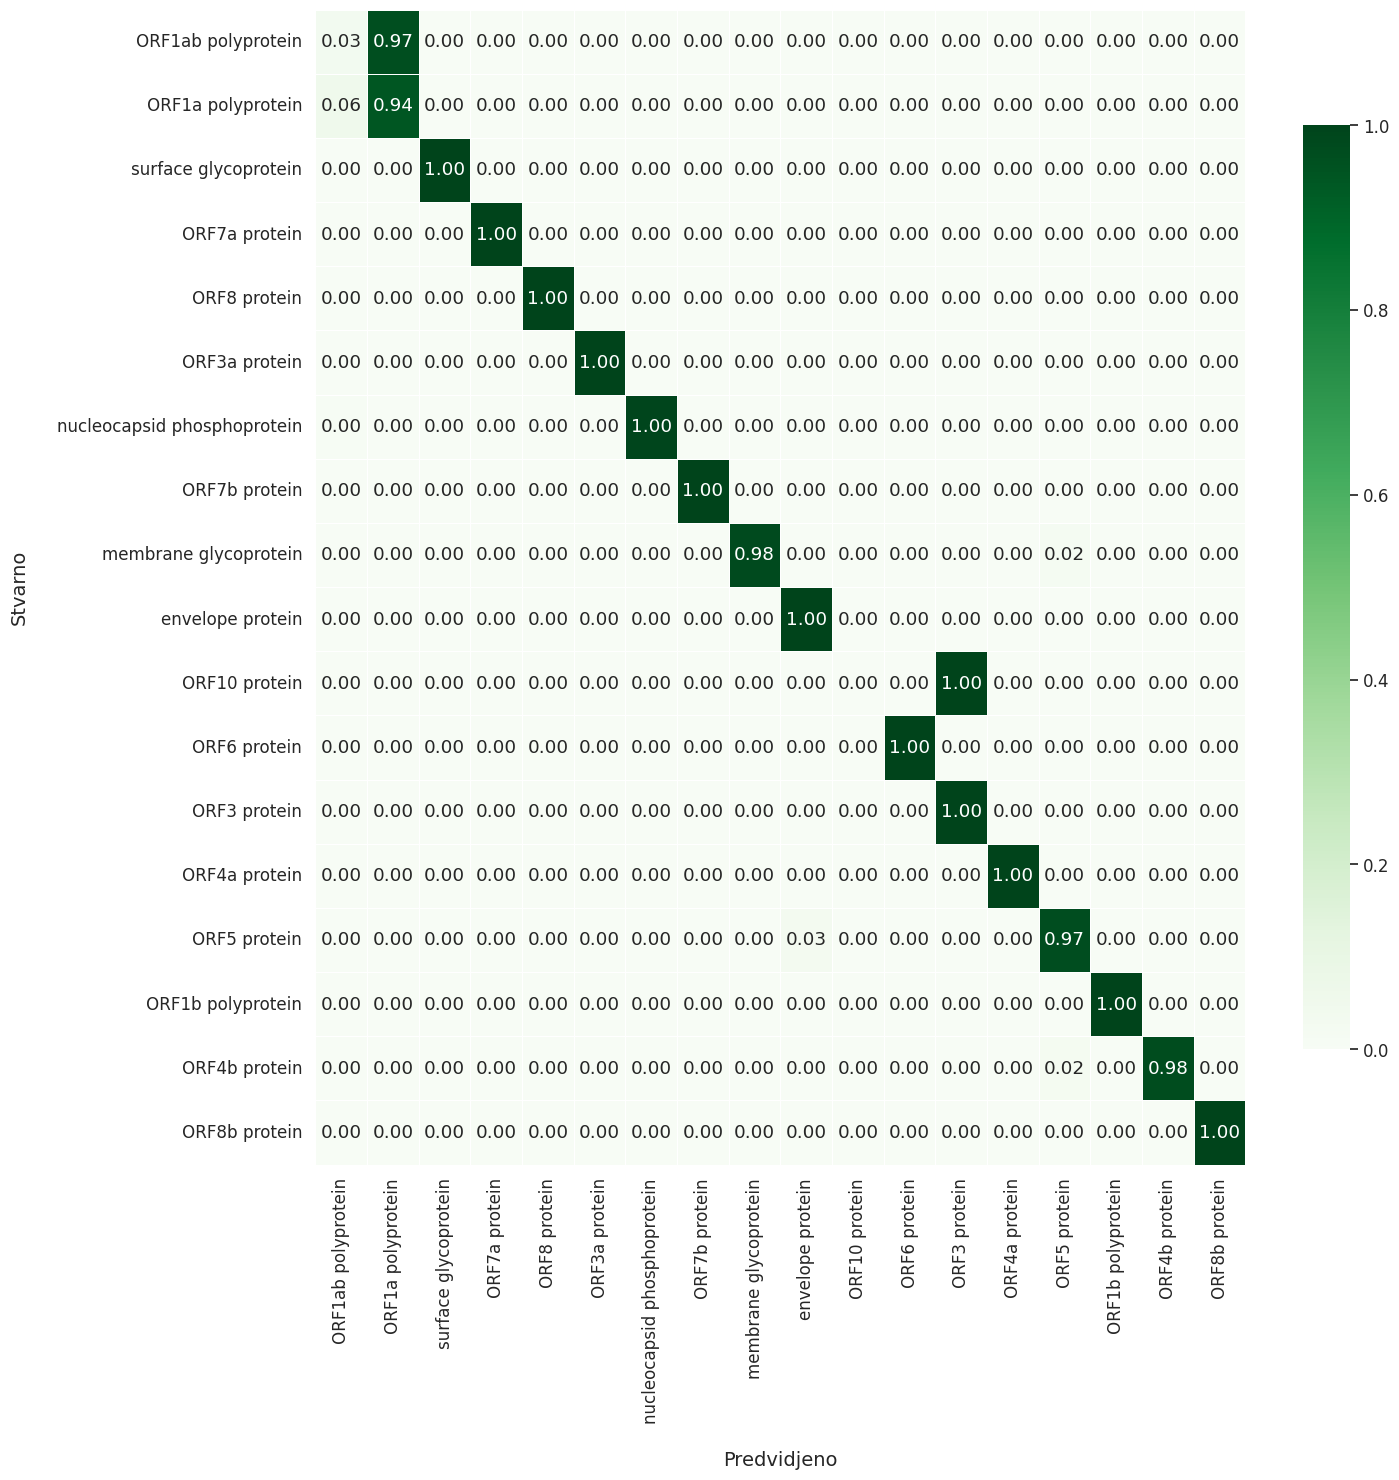

In [56]:
perform_and_evaluate_knn(3, distance_from_matrix,X_train,X_test,y_train,y_test,labels)

model evalutaion for k=3 and metric=<function distance_with_num_triplets_difference at 0x771b285b72e0>
accuracy_score: 0.9983933899472114
Originalna matrica:
[[1899    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0 1371    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0  550    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    8    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0   24    0    0    0    0    1    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0   73    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0  211    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    3    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0   44    0    0    0    0    0
     1    

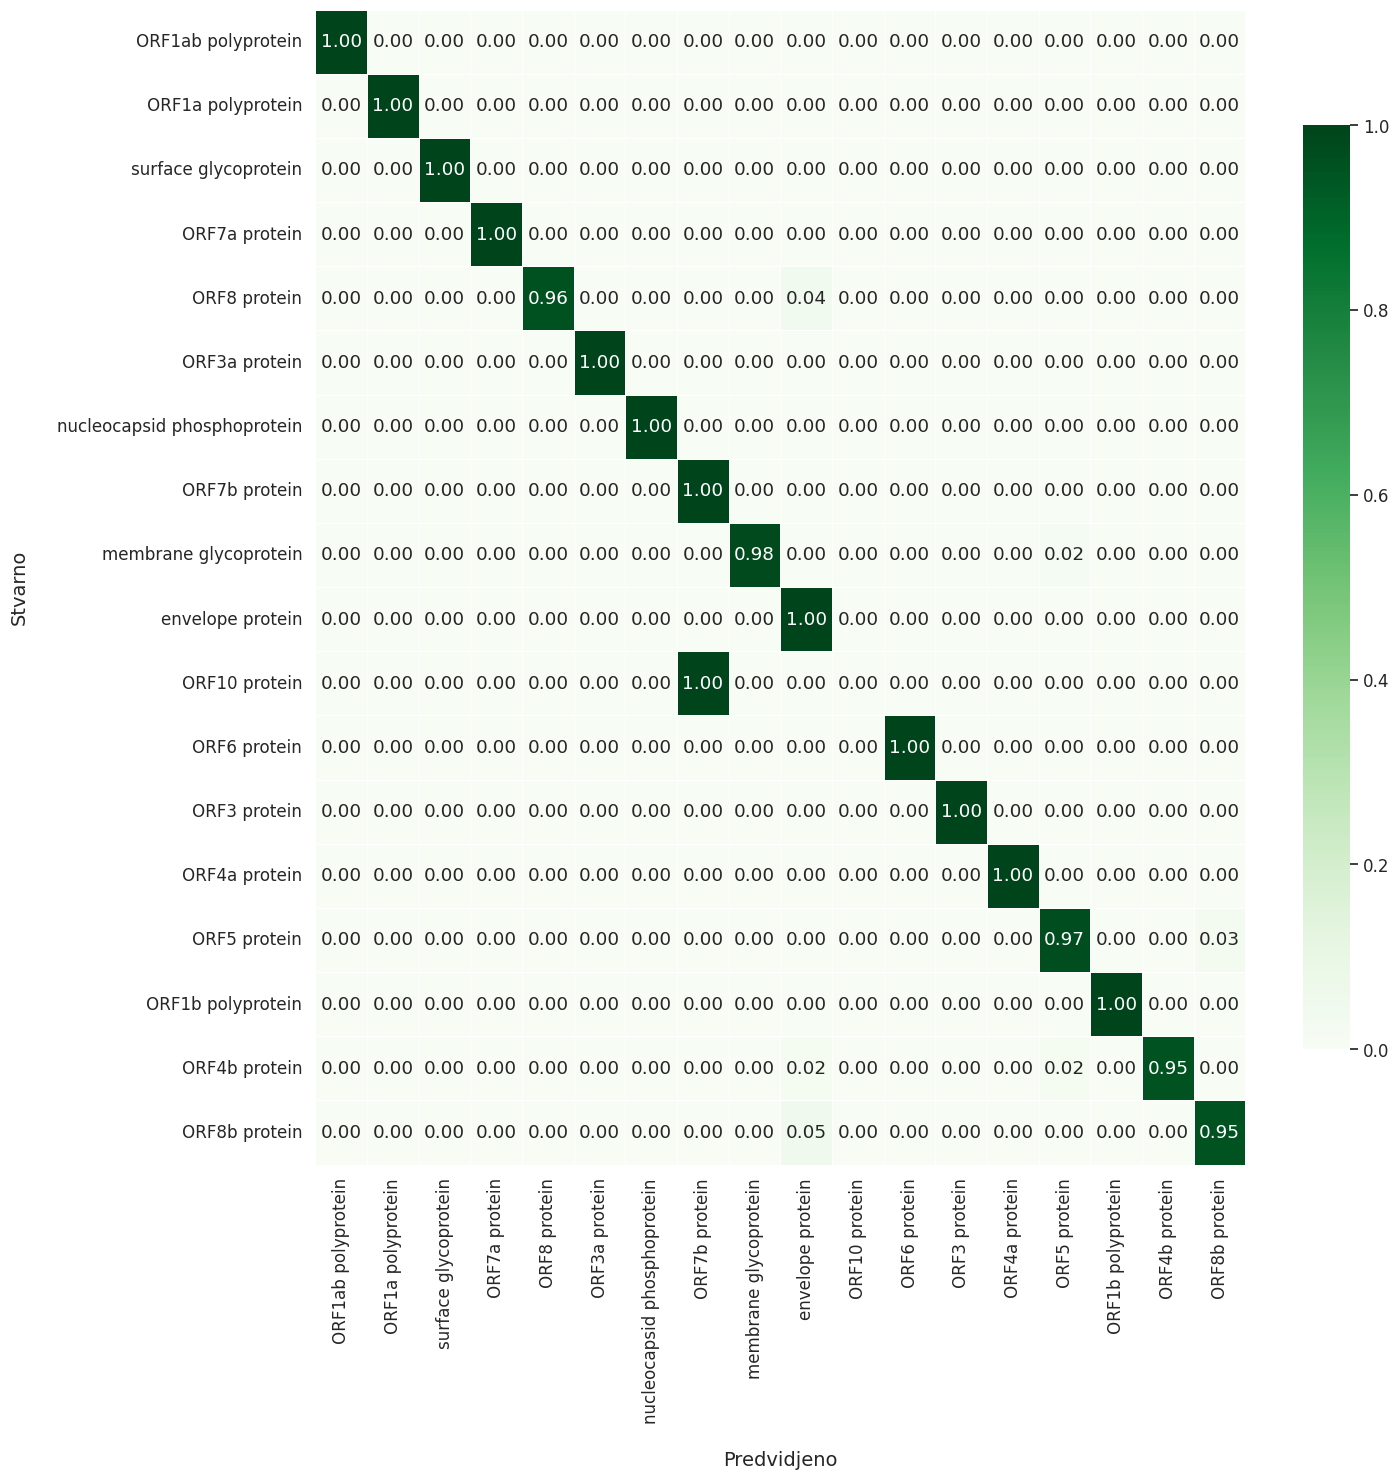

In [58]:
perform_and_evaluate_knn(3, distance_with_num_triplets_difference,X_train,X_test,y_train,y_test,labels)

In [20]:
perform_and_evaluate_knn(3, distance_with_num_nucleotides_difference)

model evalutaion for k=3 and metric=<function distance_with_num_nucleotides_difference at 0x7f36978afe50>
accuracy_score: 0.9986229056690383
[[   0    0    0    0    0    0    0    0    0    0    0    1    0    0
     0    0    0    0]
 [   0 1371    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0 1899    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    2    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0   34    0    0    0    0    0    0    0    0    1
     0    0    0    0]
 [   0    0    0    0    0   73    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0   22    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0   42    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    2   32    0    0    0    0    0
     0    0    0    0]
 [  

In [21]:
#izdvojiti sars2 i uraditi klasifikaciju po who

<h1> KNN on who_type using p-adic distance </h1>

In [59]:
import numpy as np

virusTypes = np.array(X['Virus'])
X_who = []
indexes = []
for i in range(len(virusTypes)):
    if(virusTypes[i].strip() == "SARS_COV_2"):
        X_who.append([0, i])
        indexes.append(i)

sars2_only = X.filter(items=indexes, axis=0)

In [2]:
y_who=sars2_only["WHO_TYPE"].str.strip()

X_train, X_test, y_train, y_test = train_test_split(X_who, y_who, test_size=0.33, stratify=y_who)

NameError: name 'sars2_only' is not defined

In [1]:
labels=y_train.unique()
X_train.head()

NameError: name 'y_train' is not defined

model evalutaion for k=3 and metric=<function distance_from_matrix at 0x771b285b7520>
accuracy_score: 0.2
Originalna matrica:
[[ 64 407   0   0  24   0   0   0   0   0   0   0   0]
 [  0 491   0   0   1   2   0   1   0   0   0   0   0]
 [  1 467   5   0  20   2   0   0   0   0   0   0   0]
 [  0 474   8   9   4   0   0   0   0   0   0   0   0]
 [  1 403   0   0  89   1   0   0   1   0   0   0   0]
 [  1 401   1   0  27  65   0   0   0   0   0   0   0]
 [  1 138   0   0  14   0   1   0   0   0   0   0   0]
 [  1 181   0   1   2   0   0  22   0   0   0   0   0]
 [  0 173   1   0  17   0   0   1   1   0   0   0   0]
 [  0 120   9   0   1   0   0   0   4   1   0   0   0]
 [  0  21   0   0   1   0   0   0   0   0   0   0   0]
 [  0  46   0   0   6   0   0   0   0   0   0   0   0]
 [  0   6   0   0   1   0   0   0   0   0   0   0   0]]

Normalizovana matrica:
[[0.12929293 0.82222222 0.         0.         0.04848485 0.
  0.         0.         0.         0.         0.         0.
  0.        ]


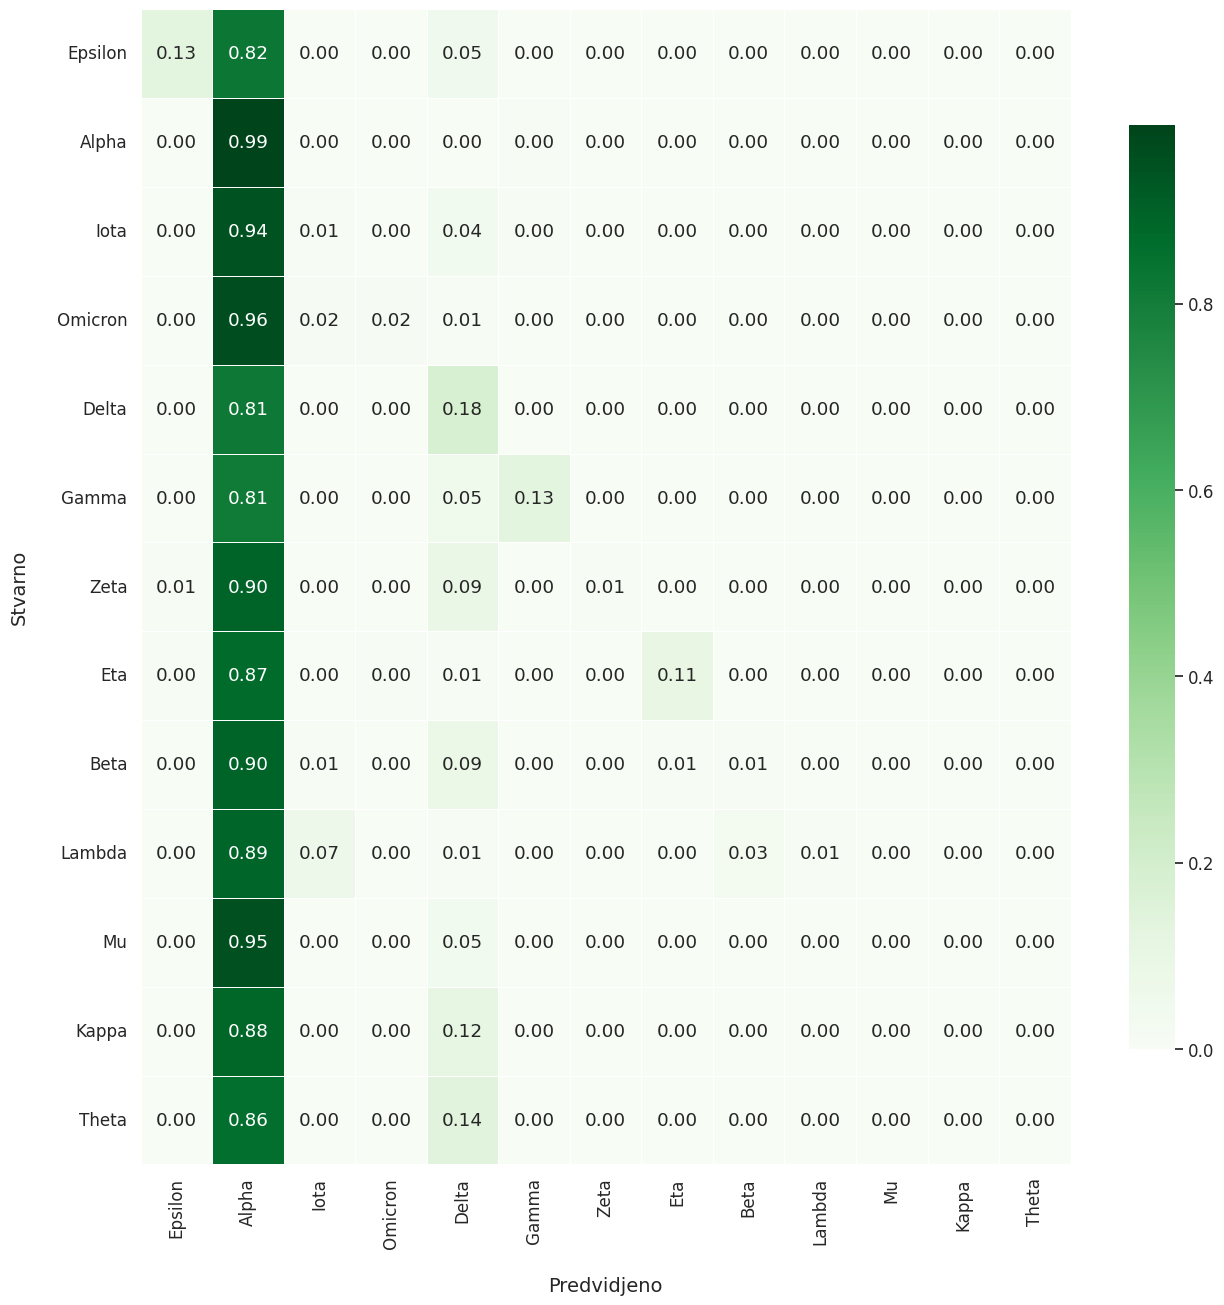

In [62]:
perform_and_evaluate_knn(3, distance_from_matrix,X_train,X_test,y_train,y_test,labels)

In [26]:
perform_and_evaluate_knn(3, distance_with_num_triplets_difference)

model evalutaion for k=3 and metric=<function distance_with_num_triplets_difference at 0x7f36978af940>
accuracy_score: 0.3245989304812834
[[484   2   3   0   0   4   0   0   0   0   2   0   0]
 [168   2  21   1   0   0   0   0   1   0   0   0   0]
 [ 16   2 475   1   0   1   0   0   0   0   0   0   0]
 [ 13   0 423  59   0   0   0   0   0   0   0   0   0]
 [176   1   2   1  25   0   1   0   0   0   1   0   0]
 [400   2  32   0   0  60   0   0   0   0   1   0   0]
 [414   1  14   2   1   3  59   0   0   0   1   0   0]
 [  0   0  42  10   0   0   0   0   0   0   0   0   0]
 [103   0   5   0   0   0  10   0  17   0   0   0   0]
 [  2   0  18   2   0   0   0   0   0   0   0   0   0]
 [295   0  20   4   1 140   3   0   0   0  32   0   0]
 [  1   0   5   0   0   0   0   0   0   0   1   0   0]
 [  2   0 127  24   0   0   0   0   0   0   0   0   1]]


In [27]:
perform_and_evaluate_knn(3, distance_with_num_nucleotides_difference)

model evalutaion for k=3 and metric=<function distance_with_num_nucleotides_difference at 0x7f36978afe50>
accuracy_score: 0.3245989304812834
[[485   1   3   0   0   4   0   0   0   0   2   0   0]
 [168   2  21   1   0   0   0   0   1   0   0   0   0]
 [ 16   2 475   1   0   1   0   0   0   0   0   0   0]
 [ 13   0 422  59   0   0   0   0   0   1   0   0   0]
 [176   1   2   1  25   0   1   0   0   0   1   0   0]
 [400   2  32   0   0  59   0   0   0   0   2   0   0]
 [414   1  14   2   1   3  59   0   0   0   1   0   0]
 [  0   0  42  10   0   0   0   0   0   0   0   0   0]
 [103   0   5   0   0   0  10   0  17   0   0   0   0]
 [  1   0  18   3   0   0   0   0   0   0   0   0   0]
 [295   0  20   4   1 140   3   0   0   0  32   0   0]
 [  1   0   5   0   0   0   0   0   0   0   1   0   0]
 [  2   0 127  24   0   0   0   0   0   0   0   0   1]]


In [28]:
# TO DO zavrsiti implementaciju GridSearch (unakrsna validacija) i implementirati GridSearch za sve 3 klasifikacije

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': list(range(2, 10)),
                                                               # 'metric' : [distance_from_matrix, distance_with_num_triplets_difference]})

In [31]:
# gs.fit(X_train, y_train)

In [32]:
# gs.best_score_

In [33]:
# y_pred = gs.predict(X_test)

In [34]:
# accuracy_score(y_test, y_pred)

In [35]:
# gs.best_estimator_